<a href="https://colab.research.google.com/github/shahmonil/Machine-Learning/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


# Simple Linear Regression

In [0]:
salary_data = pd.read_csv('Salary_Data.csv')

In [0]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [0]:
X = salary_data.loc[:,'YearsExperience']

In [0]:
type(X)

pandas.core.series.Series

In [0]:
X = X.values

In [0]:
type(X)

numpy.ndarray

In [0]:
X = X.reshape(-1,1)              ##Because 2D array is needed

In [0]:
y = salary_data.loc[:,'Salary'].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [0]:
from sklearn.linear_model import LinearRegression
lin_model  = LinearRegression()

In [0]:
type(X_train)

numpy.ndarray

In [0]:
lin_model.fit(X_train , y_train)          

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = lin_model.predict(X_test)

Visualizing the training results


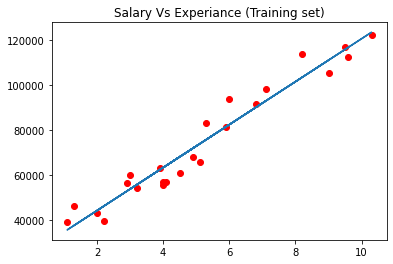

In [0]:
plt.scatter(X_train, y_train, c= 'r')
plt.plot(X_train,lin_model.predict(X_train) )
plt.title("Salary Vs Experiance (Training set)")
plt.show()

Visualizing the testing results

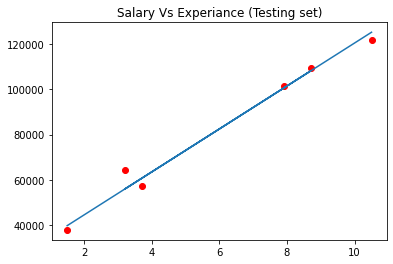

In [0]:
plt.scatter(X_test, y_test, c= 'r')
plt.plot(X_test,y_pred) 
plt.title("Salary Vs Experiance (Testing set)")
plt.show()

In [0]:
print(lin_model.intercept_)
print(lin_model.coef_)

25331.336517145217
[9525.16483929]


In [0]:
lin_model.predict([[15]])          # double square brackets because "predict" method always expects a 2D array as the format of its inputs

array([168208.80910655])

12→scalar 

[12]→1D array 

[[12]]→2D array

In [0]:
from sklearn import metrics

In [0]:
lin_model.score(X_test, y_test )

0.9814839533253316

# Multiple Linear Regression

In [0]:
df = pd.read_csv('50_Startups.csv')
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [0]:
type(X)

numpy.ndarray

In [0]:
#applying Onehotencoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [0]:
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [3])] , remainder='passthrough')
X = ct.fit_transform(X)

In [0]:
type(X)

numpy.ndarray

In [0]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [0]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [0]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = linreg.predict(X_test)

In [0]:
from sklearn import metrics
linreg.score(X_test, y_test)

0.9347068473282515

In [0]:
#seeing the results
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))       #reshape because we want it vertical

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


# **Polynomial Regression**

In [0]:
df1 = pd.read_csv('Position_Salaries.csv')
X = df1.iloc[:,1].values
y = df1.iloc[:,-1].values

In [0]:
type(X)

numpy.ndarray

In [0]:
X = X.reshape(-1,1)

In [0]:
df1.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


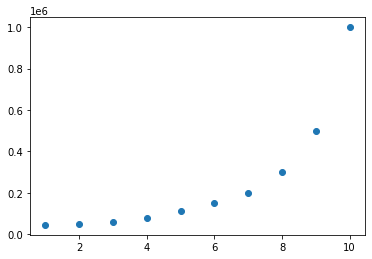

In [0]:
plt.scatter(df1.Level, df1.Salary)

In [0]:
#first i will try linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

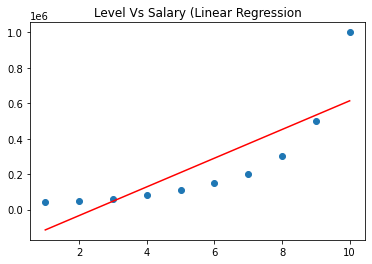

In [0]:
plt.scatter(df1.Level, df1.Salary)
plt.plot(X, lin_reg.predict(X), c = 'r')
plt.title('Level Vs Salary (Linear Regression')
plt.show()

In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [0]:
#Lets try polynomial regression now with degree = 4
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

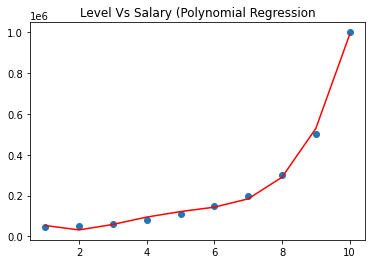

In [0]:
plt.scatter(df1.Level, df1.Salary)
plt.plot(X, lin_reg2.predict(X_poly), c = 'r')
plt.title('Level Vs Salary (Polynomial Regression')
plt.show()

In [0]:
#Polynomial fits wayy better. 

In [0]:
lin_reg.predict([[6.5]])                 #predicting via linear regression
#always need an array with 2D. 

array([330378.79])

In [0]:
lin_reg2.predict(poly_reg.fit_transform([[6.5]]))                   #predicting via polynomial regression

array([158862.45])

# Support Vector Regression (SVR)

In [0]:
df1 = pd.read_csv('Position_Salaries.csv')
X = df1.iloc[:,1].values
y = df1.iloc[:,-1].values

In [0]:
X = X.reshape(-1,1)

In [0]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [0]:
#I have to apply feature scaling in SVR.
#on both dependent and independent using different standardscalars

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

In [0]:
y = y.reshape(-1,1)         #becasue fit_transform wants input in 2d and vertical

In [0]:
print(y)       

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [0]:
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [0]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [0]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [0]:
#applying SVR

In [0]:
from sklearn.svm import SVR

In [0]:
reg = SVR()
reg.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
sc_y.inverse_transform(reg.predict(sc_X.transform([[6.5]])))

array([252789.13921624])

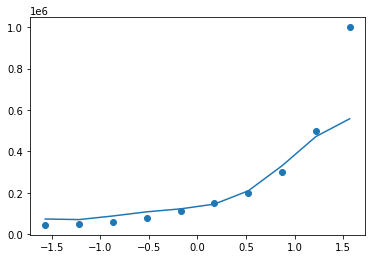

In [0]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y))
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(reg.predict(X)))
plt.show()                                 #why not the correct X-axis

In [0]:
sc_X.inverse_transform(X)

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [0]:
sc_y.inverse_transform(y)

array([[  45000.],
       [  50000.],
       [  60000.],
       [  80000.],
       [ 110000.],
       [ 150000.],
       [ 200000.],
       [ 300000.],
       [ 500000.],
       [1000000.]])

# Decision Tree Regression

In [0]:
df2 = pd.read_csv('Position_Salaries.csv')
X = df2.iloc[:,1].values
y = df2.iloc[:,-1].values

In [0]:
X= X.reshape(-1,1)

In [0]:
from sklearn.tree import DecisionTreeRegressor
dec_reg  = DecisionTreeRegressor()

In [0]:
dec_reg.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
dec_reg.predict([[6.5]])

array([150000.])

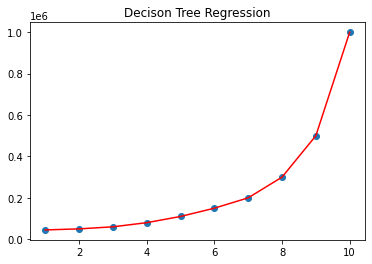

In [0]:
plt.scatter(X,y)
plt.plot(X,dec_reg.predict(X), c = 'r')
plt.title("Decison Tree Regression")
plt.show()

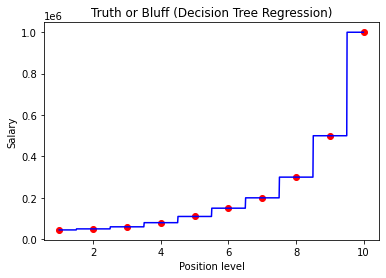

In [0]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, dec_reg.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()                               #high resolution works proper

# **Random Forest Regression** 

In [0]:
df3 = pd.read_csv('Position_Salaries.csv')
X = df3.iloc[:,1].values
y = df3.iloc[:,-1].values

In [0]:
X = X.reshape(-1,1)

In [0]:
from sklearn.ensemble import  RandomForestRegressor


In [0]:
rand_reg = RandomForestRegressor(n_estimators=10, random_state=0)

In [9]:
rand_reg.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [10]:
rand_reg.predict([[6.5]])        #predict method expects an 2D array

array([167000.])

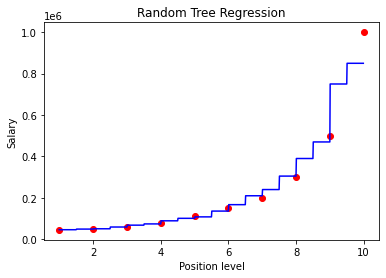

In [12]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, rand_reg.predict(X_grid), color = 'blue')
plt.title('Random Tree Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()                                  #Notice two steps between 2 values

# **Checking coefficient of Determination**

In [0]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)